In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import gc
from openai import OpenAIError, RateLimitError

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [35]:
# APIKEY 정의
api_key = "" # dybaek9_1
client = OpenAI(api_key=api_key)

In [37]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [38]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사
0,02100101.20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13부에 배당 이달중 첫 기일 이재용 항소심 13부 서...,이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13부 배당 이달 중 첫 기 ㄹ 이재용 항소심 13부 ...,이재 용 항소심 서울 고법 형사 13 부 배당 이달 중 첫 기일 이재 용 항소심 1...,이재용 항소심 서울고법 형사 13 부 배당 이달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,이재용 항소심 서울고법 형사 부 배당 이달 중 기일 이재용 항소심 부 서울고법 형사...
1,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...
2,02100101.20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재 용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재 용 항소심...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 부 배당 삼성 뇌물 신설 이재용 항소심 형사 배...
3,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...
4,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불출석 혐의 건강상태-절차적 하자로 무죄 주장 혐의 청문회 건강상태 절차적 ...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불출석 혐의 건강상태 - 절차적 하자 무죄 주장 혐의 청문회 건강상태 절차적...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,청문회 출석 혐의 건강 상태 절차 하자 무죄 주장 혐의 청문회 건강 상태 절차 무죄...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,02100101.20240821175511003,2024-08-21,매일경제,박재영 기자(jyp8909@mk.co.kr),의족 차고 자전거 국토횡단에 감동 뭉클,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,http://www.mk.co.kr/article/11098054,NaN,"의족 차고 자전거 국토횡단에 감동 뭉클 의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,...",의족 차고 자전거 국토횡단에 감동 뭉클 의족 자전거 국토횡단 감동 뭉클 왼쪽 다리 ...,의족 차고 자전거 국토횡단 감동 뭉클 의족 자전거 국토 횡단 감동 뭉클 왼쪽 다리 ...,의족 차 고 자전거 국토횡단 감동 뭉클 의족 자전거 국토횡단 감동 뭉클 왼쪽 다리 ...,의족 차고 자전거 국토 횡단 감동 뭉클 의족 자전거 국토 횡단 감동 뭉클 왼쪽 다리...,족 차고 자전거 국토 횡단 감동 뭉클 족 자전거 국토 횡단 감동 뭉클 왼쪽 다리 족...,의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...,족 차고 자전거 국토 횡단 감동 족 자전거 국토 횡단 감동 왼쪽 다리 족 횡단 국토...
4007,02100101.20240822002505001,2024-08-22,매일경제,박재영 기자(jyp8909@mk.co.kr),“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,http://www.mk.co.kr/article/11098294,NaN,"“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’ 횡단,

In [39]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [40]:
df_bigkinds['제목_키워드_전처리후_kiwi']

0       이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...
1       최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...
2       삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...
3       두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...
4       청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...
                              ...                        
4006    의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...
4007    자전거 국토 횡단 650 선수 횡단 자전거 국토 650 선수 장애 사이클 선수 박찬...
4008    부산 국제 마케팅 광고제 올해 그랑프리 수상작 발표 부산 국제 마케팅 광고제 그랑프...
4009    부음 이금서 별세 이금서 별세 이금서 별세 유경 부산 남구 장애인 복지 관장 철상 ...
4010    부고 유영 SK텔레콤 대표 모친 영상 SK 텔레콤 대표 모친 이금서 별세 유경 부산...
Name: 제목_키워드_전처리후_kiwi, Length: 4011, dtype: object

In [41]:
# chatgpt - 원래 소스 대비 10배 빨라지며 50개 샘플링으로 테스트시 sentiments 동일/predicted_texts는 상이할 수 있으나
# 원래 소스도 재실행시 상이
# 개선사항
# 1. 병렬 처리: ThreadPoolExecutor를 사용하여 동시에 여러 요청을 보낼 수 있도록 했습니다. 이렇게 하면 처리 속도가 병목 현상 없이 크게 개선됩니다.
# 2. 딜레이 최적화: RateLimitError가 발생할 때 10초를 기다리는 대신, 1초 대기 후 재시도하도록 수정했습니다. 이렇게 하면 딜레이로 인한 비효율을 줄일 수 있습니다.
# 3. 오류 처리: RateLimitError 외의 예외가 발생할 경우도 안전하게 처리하여 실행이 중단되지 않도록 했습니다.
# 4. 결과 정리: sentiments와 predicted_texts 리스트를 오류 없이 저장할 수 있도록 수정했습니다.

import concurrent.futures
import time
from tqdm import tqdm

def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ]
    while True:
        try:
            # API 호출
            response = client.chat.completions.create(
                model=model,        
                messages=messages,    
                max_tokens=50,        
                temperature=0        
            )
            result = response.choices[0].message.content
            sentiment, predicted_text = result.split('\n', 1)
            return float(sentiment.strip()), predicted_text.strip()  # 값 정리
        except RateLimitError as e:
            print(f"Rate limit reached: {e}. Retrying in 1 second...")
            time.sleep(1)  # 대기 시간을 1초로 줄임
        except Exception as e:
            print(f"An error occurred: {e}")
            return None, None  # 오류 처리

# 텍스트 분석을 병렬로 처리
def analyze_texts_in_parallel(text_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(analyze_text_impact, text_list), total=len(text_list)))
    return results

# 분석할 텍스트 리스트
text_list = df_bigkinds['제목_키워드_전처리후_kiwi'].tolist()

# 병렬 처리를 통한 결과 분석
results = analyze_texts_in_parallel(text_list)

# 결과 저장
sentiments = [result[0] for result in results if result[0] is not None]
predicted_texts = [result[1] for result in results if result[1] is not None]

100%|██████████████████████████████████████████████████████████████████████████████| 4011/4011 [03:56<00:00, 16.93it/s]


In [42]:
# 결과를 데이터프레임에 추가
df_bigkinds['GPT_Sentiment'] = sentiments
df_bigkinds['Predicted_Text'] = predicted_texts

In [43]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사,GPT_Sentiment,Predicted_Text
0,02100101.20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13부에 배당 이달중 첫 기일 이재용 항소심 13부 서...,이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13부 배당 이달 중 첫 기 ㄹ 이재용 항소심 13부 ...,이재 용 항소심 서울 고법 형사 13 부 배당 이달 중 첫 기일 이재 용 항소심 1...,이재용 항소심 서울고법 형사 13 부 배당 이달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,이재용 항소심 서울고법 형사 부 배당 이달 중 기일 이재용 항소심 부 서울고법 형사...,0.0,이재용 부회장의 항소심과 관련된 불확실성이 주가에 중립적인 영향을 미칠 것으로 보입니다.
1,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...,-1.0,"이 사건은 삼성전자와 관련된 뇌물 혐의가 포함되어 있어, 주가에 부정적인 영향을 미..."
2,02100101.20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재 용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재 용 항소심...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 부 배당 삼성 뇌물 신설 이재용 항소심 형사 배...,-1.0,이재용 부회장의 뇌물 공여 혐의와 관련된 항소심 소식은 삼성전자의 주가에 부정적인 ...
3,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
4,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불출석 혐의 건강상태-절차적 하자로 무죄 주장 혐의 청문회 건강상태 절차적 ...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불출석 혐의 건강상태 - 절차적 하자 무죄 주장 혐의 청문회 건강상태 절차적...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,청문회 출석 혐의 건강 상태 절차 하자 무죄 주장 혐의 청문회 건강 상태 절차 무죄...,0.0,"현재 상황은 불확실하며, 삼성전자의 주가에 미치는 영향이 명확하지 않습니다."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,02100101.20240821175511003,2024-08-21,매일경제,박재영 기자(jyp8909@mk.co.kr),의족 차고 자전거 국토횡단에 감동 뭉클,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"의족 차고 자전거 국토횡단에 감동 뭉클 의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,...",의족 차고 자전거 국토횡단에 감동 뭉클 의족 자전거 국토횡단 감동 뭉클 왼쪽 다리 ...,의족 차고 자전거 국토횡단 감동 뭉클 의족 자전거 국토 횡단 감동 뭉클 왼쪽 다리 ...,의족 차 고 자전거 국토횡단 감동 뭉클 의족 자전거 국토횡단 감동 뭉클 왼쪽 다리 ...,의족 차고 자전거 국토 횡단 감동 뭉클 의족 자전거 국토 횡단 감동 뭉클 왼쪽 다리...,족 차고 자전거 국토 횡단 감동 뭉클 족 자전거 국토 횡단 감동 뭉클 왼쪽 다리 족...,의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...,족 차고 자전거 국토 횡단 감동 족 자전거 국토 횡단 감동 왼쪽 다리 족 횡단 국토...,0.5,이 텍스트는 삼성전자의 갤럭시 워치 울트라 출시와 관련된 긍정적인 감정을 불러일으키...
4007,02100101.20240822002505001,2024-08-22,매일경제,박재영 기자(jyp8909@mk.co.kr),“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’ 횡단,자전.

In [44]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사',
       'GPT_Sentiment', 'Predicted_Text'],
      dtype='object')

In [45]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_bigkinds = df_bigkinds[['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2','통합 분류3',
                           '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
                           '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후_kiwi',
                           'GPT_Sentiment', 'Predicted_Text']]

In [46]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_kiwi,GPT_Sentiment,Predicted_Text
0,02100101.20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,0.0,이재용 부회장의 항소심과 관련된 불확실성이 주가에 중립적인 영향을 미칠 것으로 보입니다.
1,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,-1.0,"이 사건은 삼성전자와 관련된 뇌물 혐의가 포함되어 있어, 주가에 부정적인 영향을 미..."
2,02100101.20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,-1.0,이재용 부회장의 뇌물 공여 혐의와 관련된 항소심 소식은 삼성전자의 주가에 부정적인 ...
3,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
4,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,0.0,"현재 상황은 불확실하며, 삼성전자의 주가에 미치는 영향이 명확하지 않습니다."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,02100101.20240821175511003,2024-08-21,매일경제,박재영 기자(jyp8909@mk.co.kr),의족 차고 자전거 국토횡단에 감동 뭉클,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"제일기획,동서,삼성전자,화학회사,타다","의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,의족,횡단,국토,동서,14시간,완주,제일...","박씨,완주,정서진,정동진,제일기획,연구원,갤럭시워치,동서,2관왕,강원,온라인,퇴근길...",왼쪽 다리에 의족을 찬 사이클 선수 박찬종 씨(34)가 국토 동서 횡단을 14시간3...,http://www.mk.co.kr/article/11098054,NaN,"의족 차고 자전거 국토횡단에 감동 뭉클 의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,...",의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...,0.5,이 텍스트는 삼성전자의 갤럭시 워치 울트라 출시와 관련된 긍정적인 감정을 불러일으키...
4007,02100101.20240822002505001,2024-08-22,매일경제,박재영 기자(jyp8909@mk.co.kr),“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"제일기획,동서,삼성전자,화학회사,타다","횡단,자전거,국토,650만,선수,뭉클,장애,사이클,선수,박찬종,정동진,정서진,294...","박씨,완주,정서진,정동진,제일기획,조회수,연구원,650만,갤럭시,2관왕,패럴림픽,로...",장애 사이클 선수 박찬종 씨 \n정동진~정서진 294Km 완주 \n제일기획이 영상으...,http://www.mk.co.kr/article/11098294,NaN,"“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’ 횡단,자전...",자전거 국토 횡단 650 선수 횡단 자전거 국토 650 선수 장애 사이클 선수 박찬...,0.5,이 텍스트는 삼성전자의 갤럭시 스마트 시계와 관련된 긍정적인 마케팅 캠페인을 언급하...
4008,02100101.20240825142511001,2024-08-25,매일경제,박재영 기자(jyp8909@

In [51]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_kiwi_chatgpt.xlsx', index=False)

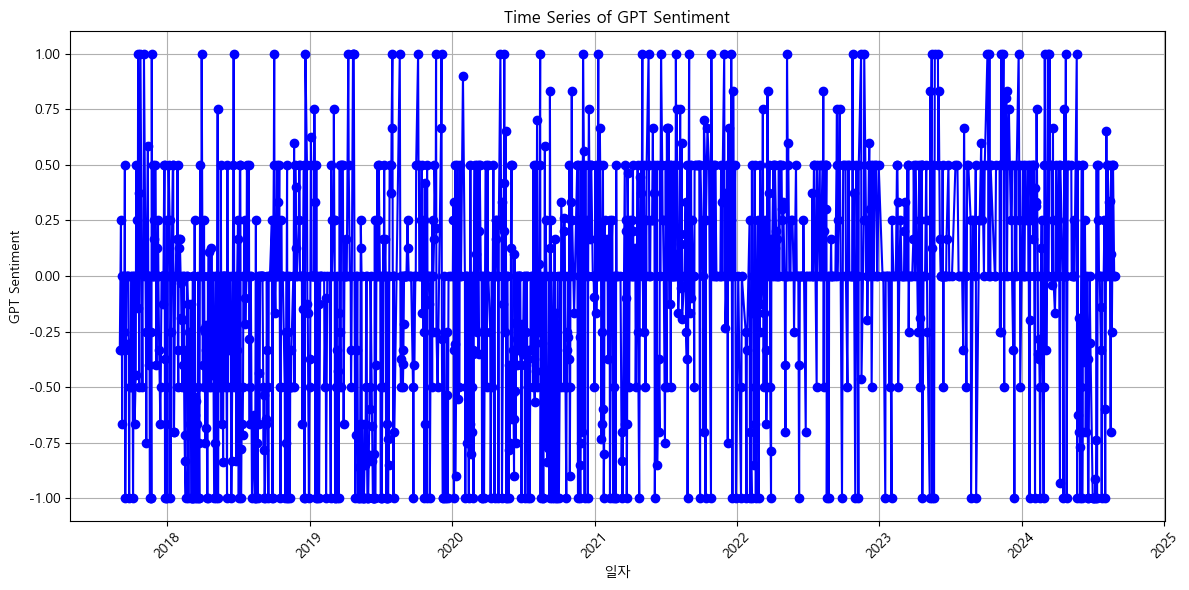

In [52]:
# 'Date' 열을 datetime 타입으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_bigkinds_grouped = df_bigkinds.groupby('일자')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_bigkinds_grouped['일자'], df_bigkinds_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('일자')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [53]:
df_bigkinds_avg = df_bigkinds.groupby('일자', as_index=False)['GPT_Sentiment'].mean()

# 결과 확인
df_bigkinds_avg

,일자,GPT_Sentiment
0,2017-09-01,-0.333333
1,2017-09-04,0.250000
2,2017-09-05,-0.333333
3,2017-09-06,0.000000
4,2017-09-07,-0.666667
...,...,...
1483,2024-08-20,0.000000
1484,2024-08-21,0.500000
1485,2024-08-22,0.500000
1486,2024-08-25,0.000000


In [54]:
# 감정 분석 결과 저장(일자별)
df_bigkinds_avg.to_excel('./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_kiwi_chatgpt_daily.xlsx', index=False)

chatgpt의 경우 다시 평가하는 경우 비용발생하여 기존에 평가 데이터를 필터링하여 정상 데이터만 추출

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_kiwi_chatgpt.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_kiwi,GPT_Sentiment,Predicted_Text
0,02100101.20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,0.0,이재용 부회장의 항소심과 관련된 불확실성이 주가에 중립적인 영향을 미칠 것으로 보입니다.
1,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,-1.0,"이 사건은 삼성전자와 관련된 뇌물 혐의가 포함되어 있어, 주가에 부정적인 영향을 미..."
2,02100101.20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,-1.0,이재용 부회장의 뇌물 공여 혐의와 관련된 항소심 소식은 삼성전자의 주가에 부정적인 ...
3,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
4,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,0.0,"현재 상황은 불확실하며, 삼성전자의 주가에 미치는 영향이 명확하지 않습니다."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,02100101.20240821175511003,2024-08-21,매일경제,박재영 기자(jyp8909@mk.co.kr),의족 차고 자전거 국토횡단에 감동 뭉클,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"제일기획,동서,삼성전자,화학회사,타다","의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,의족,횡단,국토,동서,14시간,완주,제일...","박씨,완주,정서진,정동진,제일기획,연구원,갤럭시워치,동서,2관왕,강원,온라인,퇴근길...",왼쪽 다리에 의족을 찬 사이클 선수 박찬종 씨(34)가 국토 동서 횡단을 14시간3...,http://www.mk.co.kr/article/11098054,NaN,"의족 차고 자전거 국토횡단에 감동 뭉클 의족,자전거,국토횡단,감동,뭉클,왼쪽,다리,...",의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...,0.5,이 텍스트는 삼성전자의 갤럭시 워치 울트라 출시와 관련된 긍정적인 감정을 불러일으키...
4007,02100101.20240822002505001,2024-08-22,매일경제,박재영 기자(jyp8909@mk.co.kr),“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"제일기획,동서,삼성전자,화학회사,타다","횡단,자전거,국토,650만,선수,뭉클,장애,사이클,선수,박찬종,정동진,정서진,294...","박씨,완주,정서진,정동진,제일기획,조회수,연구원,650만,갤럭시,2관왕,패럴림픽,로...",장애 사이클 선수 박찬종 씨 \n정동진~정서진 294Km 완주 \n제일기획이 영상으...,http://www.mk.co.kr/article/11098294,NaN,"“자전거 국토 횡단에 650만명이 울었다”...이 선수 보자마자 ‘뭉클’ 횡단,자전...",자전거 국토 횡단 650 선수 횡단 자전거 국토 650 선수 장애 사이클 선수 박찬...,0.5,이 텍스트는 삼성전자의 갤럭시 스마트 시계와 관련된 긍정적인 마케팅 캠페인을 언급하...
4008,02100101.20240825142511001,2024-08-25,매일경제,박재영 기자(jyp8909@

In [7]:
# 뉴스 식별자 컬럼에서 '.' 이후의 값만 조회
df_bigkinds['뉴스 식별자'] = df_bigkinds['뉴스 식별자'].str.split('.').str[1]

분석제외 대상과 중복건 제거

In [10]:
df_bigkinds = df_bigkinds[df_bigkinds['분석제외 여부'].isnull()]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_kiwi,GPT_Sentiment,Predicted_Text
0,20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,0.0,이재용 부회장의 항소심과 관련된 불확실성이 주가에 중립적인 영향을 미칠 것으로 보입니다.
1,20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,-1.0,"이 사건은 삼성전자와 관련된 뇌물 혐의가 포함되어 있어, 주가에 부정적인 영향을 미..."
2,20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,-1.0,이재용 부회장의 뇌물 공여 혐의와 관련된 항소심 소식은 삼성전자의 주가에 부정적인 ...
3,20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
4,20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,0.0,"현재 상황은 불확실하며, 삼성전자의 주가에 미치는 영향이 명확하지 않습니다."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,20240819060124001,2024-08-19,서울경제,공준호 기자,'퇴직금 두둑히 챙겨 퇴사' 벌써 옛말? 은행 안 떠나는 은행원,경제>금융_재테크,사회>노동_복지,경제>유통,NaN,NaN,...,"KB국민은행,하나은행,정부,NH농협,경기,우리은행,신한은행,하나,국민,삼성전자,KB국민","퇴직금,퇴사,옛말,은행,은행원,신청,시중은행,상반기,1년,희망,퇴직,은행원,목돈,기...","퇴직금,퇴직자,신한은행,하나은행,희망퇴직,희망퇴직자,은행권,상반기,1인,희망퇴직금,...","시중은행에서 상반기와 하반기, 1년에 두 번 받는 희망 퇴직은 은행원에게는 목돈을 ...",http://www.sedaily.com/NewsView/2DD2R81FSO,NaN,"'퇴직금 두둑히 챙겨 퇴사' 벌써 옛말? 은행 안 떠나는 은행원 퇴직금,퇴사,옛말,...",퇴직금 퇴사 옛말 은행 은행원 퇴직금 퇴사 옛말 은행 은행원 신청 시중 은행 상반기...,0.0,"이 텍스트는 은행권의 희망 퇴직자 증가와 관련된 내용으로, 삼성전자의 주가에 직접적..."
4005,20240820150930001,2024-08-20,서울경제,정예지 기자,대기업도 고령화 임직원 구성에서 50세 이상이 20대 역전,경제>유통,경제>무역,사회>사회일반,NaN,NaN,...,"기아,리더스인덱스,삼성전자","대기업,고령화,임직원,구성,50세,역전,임직원,연령대,대기업,임직원,구성,20대,감...","50세,임직원,50대,1만,대기업,20대,경력자,고령화,자동차,연령대",국내 주요 대기업의 임직원 구성을 살펴보니 20대는 감소하고 50대 이상은 증가하는...,http://www.sedaily.com/NewsView/2DD399DOLY,NaN,"대기업도 고령화 임직원 구성에서 50세 이상이 20대 역전 대기업,고령화,임직원,구...",기업 고령 임직원 구성 50 20 역전 기업 고령 임직원 구성 50 역전 임직원 연...,0.0,이 텍스트는 삼성전자의 임직원 구성 변화와 관련된 정보가 혼재되어 있어 주가에 대한...
4006,20240821175511003,2024-08-21,매일경제,박재영 기자(jyp8909@mk.co.kr),의족 차고 자전거 국토횡단에 감동 뭉클,사회>사회일반,NaN,NaN,사고>스포츠사고,NaN,...,"제일기획,동

뉴스 식별자 최소값 기준으로 제목_키워드_전처리후 그룹핑

In [15]:
# 그룹핑할 컬럼 리스트
group_columns = ['제목_키워드_전처리후_kiwi']

# 각 그룹에서 뉴스 식별자 컬럼의 최소값을 유지
df_bigkinds2 = df_bigkinds.groupby(group_columns, as_index=False).agg({'뉴스 식별자': 'min'})

In [17]:
df_bigkinds2

,제목_키워드_전처리후_kiwi,뉴스 식별자
0,078 실형 선고 이재용 정면 응시 한동안 침묵 078 실형 선고 이재용 정면 응시...,20210118151417001
1,10 개월 마무리 이재용 국정 농단 파기 환송심 쟁점 개월 마무리 파기 환송심 이재...,20201229141426001
2,10 기대 노조 총파업 선언 찬물 10 찬물 노조 총파업 선언 사흘 화성 사업장 결...,20240707224505001
3,100 1000 아깝 삼성 서울대 어린이 병원 기부 약정 개최 100 1000 삼성...,20210503163345002
4,100 기업 여성 임원 2.3 증가 비중 3.6 기업 여성 임원 증가 비중 3.6 ...,20191029085826001
...,...,...
3556,횡령 증거 인멸 김태한 삼바 대표 1심 무죄 횡령 증거 인멸 김태 1심 삼바 대표 ...,20240214153159001
3557,후레 대학교 몽골 전체 수석 입학 후레 대학교 몽골 수석 몽골 입학 영어 한국어 정...,20220404174003001
3558,휴가 법원 대형 재판 이달 이재용 양승태 선고 휴가 법원 휴가 대형 재판 이달 이재...,20240107175510002
3559,휴가 요구 삼성전자 파업 위기 휴가 요구 삼성전자 파업 위기 임금 교섭 입장 삼성전...,20220327154552001


In [19]:
# 필요한 컬럼만 선택하여 두 데이터프레임 병합
big_kinds_sentiment = pd.merge(
    df_bigkinds[['제목_키워드_전처리후_kiwi', '뉴스 식별자','일자','GPT_Sentiment','Predicted_Text']],
    df_bigkinds2[['제목_키워드_전처리후_kiwi', '뉴스 식별자']],
    on=['제목_키워드_전처리후_kiwi', '뉴스 식별자'],
    how='inner'
)

big_kinds_sentiment = big_kinds_sentiment[['뉴스 식별자', '일자', '제목_키워드_전처리후_kiwi', 'GPT_Sentiment', 'Predicted_Text']]
big_kinds_sentiment

,뉴스 식별자,일자,제목_키워드_전처리후_kiwi,GPT_Sentiment,Predicted_Text
0,20170901163910001,2017-09-01,이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,0.0,이재용 부회장의 항소심과 관련된 불확실성이 주가에 중립적인 영향을 미칠 것으로 보입니다.
1,20170901174354001,2017-09-01,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,-1.0,"이 사건은 삼성전자와 관련된 뇌물 혐의가 포함되어 있어, 주가에 부정적인 영향을 미..."
2,20170901181209001,2017-09-01,삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,-1.0,이재용 부회장의 뇌물 공여 혐의와 관련된 항소심 소식은 삼성전자의 주가에 부정적인 ...
3,20170901141935001,2017-09-01,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
4,20170901153936001,2017-09-01,청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,0.0,"현재 상황은 불확실하며, 삼성전자의 주가에 미치는 영향이 명확하지 않습니다."
...,...,...,...,...,...
3556,20240819060124001,2024-08-19,퇴직금 퇴사 옛말 은행 은행원 퇴직금 퇴사 옛말 은행 은행원 신청 시중 은행 상반기...,0.0,"이 텍스트는 은행권의 희망 퇴직자 증가와 관련된 내용으로, 삼성전자의 주가에 직접적..."
3557,20240820150930001,2024-08-20,기업 고령 임직원 구성 50 20 역전 기업 고령 임직원 구성 50 역전 임직원 연...,0.0,이 텍스트는 삼성전자의 임직원 구성 변화와 관련된 정보가 혼재되어 있어 주가에 대한...
3558,20240821175511003,2024-08-21,의족 자전거 국토 횡단 감동 의족 자전거 국토 횡단 감동 왼쪽 다리 의족 횡단 국토...,0.5,이 텍스트는 삼성전자의 갤럭시 워치 울트라 출시와 관련된 긍정적인 감정을 불러일으키...
3559,20240822002505001,2024-08-22,자전거 국토 횡단 650 선수 횡단 자전거 국토 650 선수 장애 사이클 선수 박찬...,0.5,이 텍스트는 삼성전자의 갤럭시 스마트 시계와 관련된 긍정적인 마케팅 캠페인을 언급하...


In [21]:
big_kinds_sentiment.to_excel('./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_kiwi_chatgpt_filter.xlsx', index=False)

In [23]:
big_kinds_sentiment_avg = big_kinds_sentiment.groupby('일자', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].round(1)
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
big_kinds_sentiment_avg

,일자,GPT_Sentiment
0,2017-09-01,-0.3
1,2017-09-04,0.2
2,2017-09-05,-0.4
3,2017-09-06,0.0
4,2017-09-07,-0.7
...,...,...
1384,2024-08-19,-0.2
1385,2024-08-20,0.0
1386,2024-08-21,0.5
1387,2024-08-22,0.5


In [25]:
# 감정 분석 결과 저장(일자별)
big_kinds_sentiment_avg.to_excel('./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_kiwi_chatgpt_daily_filter.xlsx', index=False)